In [20]:
import os
from glob import glob
import json

import numpy as np
import pandas as pd
import seaborn as sns

import datetime
import calendar

import matplotlib.pyplot as plt
from pprint import pprint
from IPython.display import display

## Background

A mid-sized midwest city has a "parking congestion problem" in its downtown, especially in parking lots that are adjacent to event venues. To help balance parking supply and demand, the City introduced free shuttle services between periphery parking lots and downtown to encourage parkers to choose periphery parking lots. This analysis illustrates how the shuttle services affected the usage of periphery and downtown parking lots. 

## Data

Parking usage is measured by "hourly arrival", which shows how many cars arrived and parked at a parking lot within a hour. For example, an "hourly arrival" of 20 at 8am at a parking lot suggests that between 8am and 9am, 20 cars arrived and parked at that lot. The raw data contains hourly arrivals on every day during Jan 1, 2018 - October 31, 2018 for four downtown parking lots and four periphery parking lots. All four periphery lots have shuttle services to downtown; all four downtown lots are adjacent to event venues. 

The shuttle services were introduced in August. Data for January - June represents parking usage "before" the introduction of the shuttle services; data for September - October represents parking usage "after" the introduction of the shuttle services. The months of July and August are isolated because during the summer time, the travel behaviors of commuters and visitors tend to be different from in the other months. Event schedules also tend to be different in the summer. "Average hourly arrival" measures the usage levels in each period. Weekday and weekend usages are measured separately to account for the different parking behaviors of commuters and visitors. 

In [21]:
startDate = datetime.datetime(2018, 1, 1, 0, 0)
date_list = [startDate + datetime.timedelta(minutes=60*x) for x in range(0, 7296)]
before = datetime.datetime(2018, 7, 1, 0, 0).date()
after = datetime.datetime(2018, 9, 1, 0, 0).date()
datetext=[x.strftime('%Y-%m-%d T%H:%M Z') for x in date_list]
dateOnly = [x.date() for x in date_list]
hr = [x.hour for x in date_list]
weekNo = [x.weekday() for x in date_list]

def modify(df):
    df['time'] = datetext
    df['hr'] = hr
    df['date'] = dateOnly
    df.loc[:,'period'] = np.where(df['date'] < before,'Jan-Jun',np.where(df['date'] >= after,'Sep-Oct','Summer'))
    df['weekNo'] = weekNo
    df['weekday'] = np.where(df['weekNo'] < 5, 'weekday', 'weekend')

## Visualize Average Hourly Arrivals

Downtown 1


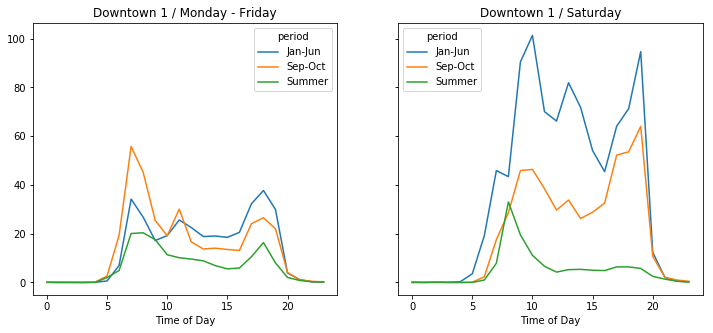

Downtown 2


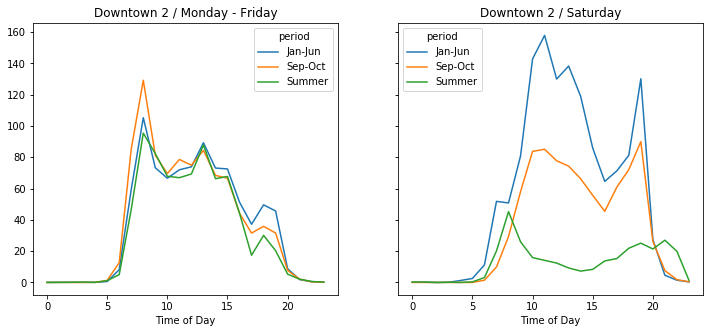

Downtown 3


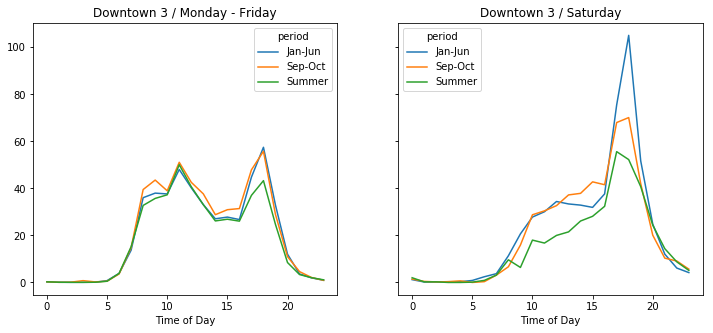

Downtown 4


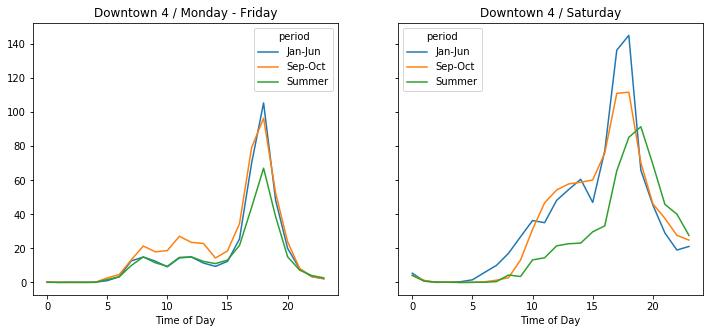

Periphery 1


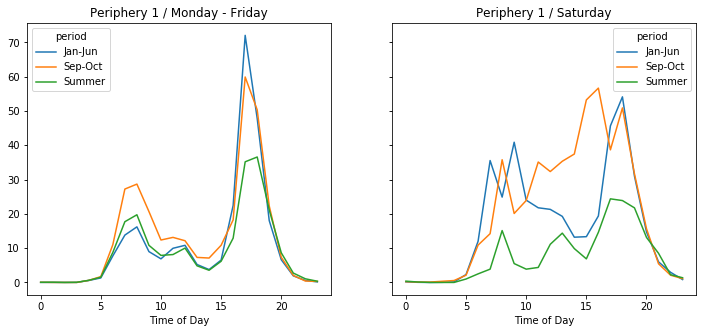

Periphery 2


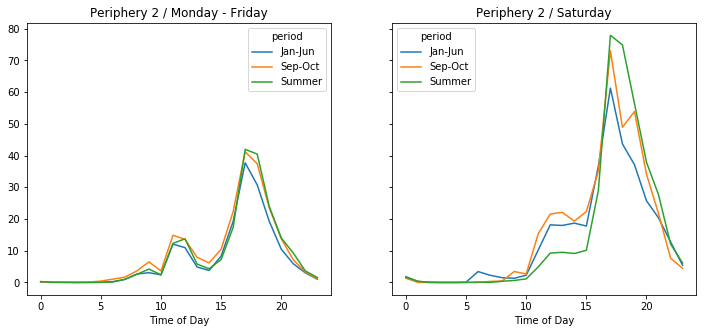

Periphery 3


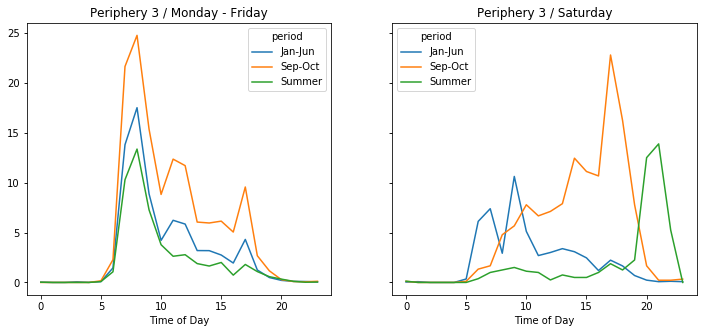

Periphery 4


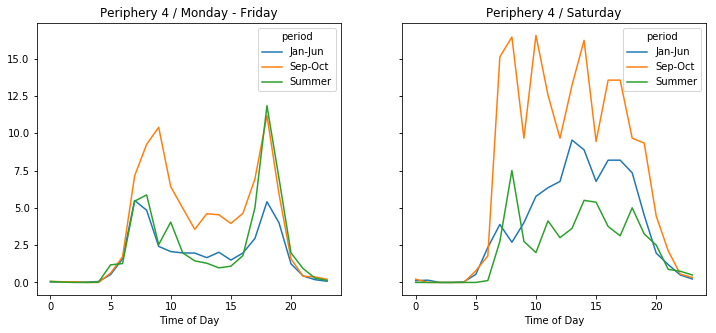

In [22]:
for filename in sorted(glob('/data/shuttle/*.txt')):
    basename = os.path.split(filename)[1][:-4]
    print(basename)
    with open(filename,'r') as file:
        df = pd.DataFrame()
        d = json.load(file)
        for item in d['value']:
            if item['group'] in item['group'] :
                col_name = item['group']
                df[col_name] = item['value']
        df['loct'] = basename
        modify(df)
        df.to_csv(basename+'.csv')
        plot_arrival(df)
        

def plot_arrival(df):
    f,((ax1,ax2)) = plt.subplots(1,2,sharey='row',figsize = (12,5))
    df[(df['weekday'] == 'weekday')].groupby(['hr','period'])['Transient'].mean().unstack().plot(ax = ax1)
    df[(df['weekNo'] == 5)].groupby(['hr','period'])['Transient'].mean().unstack().plot(ax = ax2)
    ax1.set_title(basename.capitalize() + " / " + 'Monday - Friday')
    ax2.set_title(basename.capitalize() + " / " +'Saturday')
    ax1.set_xlabel('Time of Day')
    ax2.set_xlabel('Time of Day')
    plt.show()

## Findings

1. Most downtown parking lots saw moderate decreases in average hourly arrival in weekday evenings, suggesting that some event-goers who used to park in downtown are parking in the periphery.

2. Most downtown parking lots saw significant decreases in average hourly arrival on the weekend. Considering that the hourly arrival level was much higher on weekend than on weekdays before the introduction of the shuttle services, this indiciates that parkers who experienced a higher level of congestion were more willing to switch to periphery parking. 

3. Most periphery parking lots saw moderate increases in average hourly arrival in weekday evenings and significant increases in average hourly arrival on the weekend, which is consistent with the changes at downtown lots.

4. Most periphery parking lots also saw increases in average hourly arrival during morning commute hours, indicating that the shuttle services have also attracted commuters.  